**Title: Topic Modelling & NPL on Newsgroup dataset**

**Objective:**

The objective of this project is to conduct topic modeling on the popular newgroup dataset to ascertain the topics being discussed in various different subject matters.

Methedology:

    Exploring text datasets
    Extracting substrings with regular expressions
    Finding keyword correlations in text data
    Cleaning text data
    Applying topic modelling using LDA
    Applying topic modelling using BERT


Importing relevant libraries

In [1]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy

!pip install pyLDAvis --quiet
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
%matplotlib inline

import nltk; nltk.download('stopwords')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.2 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [96]:
df = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')
df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space
...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,13,sci.med
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,4,comp.sys.mac.hardware
11311,From: westes@netcom.com (Will Estes)\nSubject:...,3,comp.sys.ibm.pc.hardware
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,1,comp.graphics


In [95]:
df.shape()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



TypeError: 'tuple' object is not callable

In [3]:
df['Length'] = df['content'].str.len()
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,Length
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16,talk.politics.guns,2602
6,From: bmdelane@quads.uchicago.edu (brian manni...,13,sci.med,583
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3,comp.sys.ibm.pc.hardware,2834
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2,comp.os.ms-windows.misc,318
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4,comp.sys.mac.hardware,1550


In [4]:
def word_count(review):
    review_list = review.split()
    return len(review_list)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df['Word_count'] = df['content'].apply(word_count)
df.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names,Length,Word_count
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos,721,123
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,858,123
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,1981,339
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics,815,113
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,1120,171
5,From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)\...,16,talk.politics.guns,2602,398
6,From: bmdelane@quads.uchicago.edu (brian manni...,13,sci.med,583,82
7,From: bgrubb@dante.nmsu.edu (GRUBB)\nSubject: ...,3,comp.sys.ibm.pc.hardware,2834,416
8,From: holmes7000@iscsvax.uni.edu\nSubject: WIn...,2,comp.os.ms-windows.misc,318,50
9,From: kerr@ux1.cso.uiuc.edu (Stan Kerr)\nSubje...,4,comp.sys.mac.hardware,1550,244


In [6]:
df = df.drop(['Length','Word_count'], axis=1)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,content,target,target_names
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7,rec.autos
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1,comp.graphics
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11314 entries, 0 to 11313
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   content       11314 non-null  object
 1   target        11314 non-null  int64 
 2   target_names  11314 non-null  object
dtypes: int64(1), object(2)
memory usage: 353.6+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**Data pre-processing**

Removing emails and newline characters

In [8]:
# Convert to list
data = df.content.values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove single quotes
data = [re.sub("\'", "", sent) for sent in data]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:5: DeprecationWarning: invalid escape sequence '\S'
<>:8: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\S'
<>:8: DeprecationWarning: invalid escape sequence '\s'
<ipython-input-8-e72d87254479>:5: DeprecationWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
<ipython-input-8-e72d87254479>:8: DeprecationWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [11]:
data[0]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'From: (wheres my thing) Subject: WHAT car is this!? Nntp-Posting-Host: rac3.wam.umd.edu Organization: University of Maryland, College Park Lines: 15 I was wondering if anyone out there could enlighten me on this car I saw the other day. It was a 2-door sports car, looked to be from the late 60s/ early 70s. It was called a Bricklin. The doors were really small. In addition, the front bumper was separate from the rest of the body. This is all I know. If anyone can tellme a model name, engine specs, years of production, where this car is made, history, or whatever info you have on this funky looking car, please e-mail. Thanks, - IL ---- brought to you by your neighborhood Lerxst ---- '

After removing the emails and extra spaces, the text still looks messy. It is not ready for the LDA to consume. Thus, breaking down each sentence into a list of words through tokenization, while clearing up all the messy text in the process.

Tokenize words and Clean-up text: Tokenizing each sentence into a list of words, removing punctuations and unnecessary characters altogether.

In [12]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
print(data_words[:1])

[['from', 'wheres', 'my', 'thing', 'subject', 'what', 'car', 'is', 'this', 'nntp', 'posting', 'host', 'rac', 'wam', 'umd', 'edu', 'organization', 'university', 'of', 'maryland', 'college', 'park', 'lines', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'saw', 'the', 'other', 'day', 'it', 'was', 'door', 'sports', 'car', 'looked', 'to', 'be', 'from', 'the', 'late', 'early', 'it', 'was', 'called', 'bricklin', 'the', 'doors', 'were', 'really', 'small', 'in', 'addition', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', 'this', 'is', 'all', 'know', 'if', 'anyone', 'can', 'tellme', 'model', 'name', 'engine', 'specs', 'years', 'of', 'production', 'where', 'this', 'car', 'is', 'made', 'history', 'or', 'whatever', 'info', 'you', 'have', 'on', 'this', 'funky', 'looking', 'car', 'please', 'mail', 'thanks', 'il', 'brought', 'to', 'you', 'by', 'your', 'neighborhood', 'lerxst']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
eda = []
for i in range(len(data_words)):
    eda += data_words[i]
len(eda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


3011222

In [27]:
from collections import Counter

mostCommon = Counter(eda).most_common(10)
mostCommon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('the', 146521),
 ('to', 75061),
 ('of', 69047),
 ('ax', 58755),
 ('and', 57953),
 ('in', 49377),
 ('is', 43429),
 ('that', 37781),
 ('it', 29736),
 ('for', 28600)]

The most common words currently are 'the','to', etc, they do not provide context on the topic being talked about and are not helpful. Thus they can be removed from the list.

In [37]:
stop_words = set(stopwords.words('english'))
eda_no_stopwords = []
for sublist in eda: # Iterate over potential sublists in eda
    for word in sublist: # Iterate over words in each sublist
        if word.lower() not in stop_words: # Convert to lowercase for case-insensitive comparison
            eda_no_stopwords.append(word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent))
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [ ]:
# lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

In [41]:
mostCommon = Counter(eda_no_stopwords).most_common(25)
mostCommon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('ax', 58755),
 ('lines', 11837),
 ('organization', 11228),
 ('would', 8892),
 ('one', 8853),
 ('writes', 7844),
 ('article', 7433),
 ('people', 5856),
 ('like', 5852),
 ('dont', 5824),
 ('university', 5580),
 ('posting', 5506),
 ('know', 5119),
 ('host', 4984),
 ('get', 4950),
 ('nntp', 4809),
 ('think', 4537),
 ('also', 4305),
 ('max', 4303),
 ('time', 4093),
 ('new', 3967),
 ('im', 3825),
 ('good', 3757),
 ('well', 3655),
 ('could', 3499)]

In [62]:
custom_stop_words = {'im', 'would', 'nntp', 'also', 'could','well','may','from', 'subject', 're', 'edu', 'use','host'}
stop_words.update(custom_stop_words)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
for sublist in eda: # Iterate over potential sublists in eda
    for word in sublist: # Iterate over words in each sublist
        if word.lower() not in stop_words: # Convert to lowercase for case-insensitive comparison
            eda_no_stopwords.append(word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [64]:
mostCommon = Counter(eda_no_stopwords).most_common(25)
mostCommon

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[('ax', 352530),
 ('lines', 71022),
 ('organization', 67368),
 ('one', 53118),
 ('writes', 47064),
 ('article', 44598),
 ('people', 35136),
 ('like', 35112),
 ('dont', 34944),
 ('university', 33480),
 ('posting', 33036),
 ('know', 30714),
 ('get', 29700),
 ('think', 27222),
 ('max', 25818),
 ('time', 24558),
 ('new', 23802),
 ('good', 22542),
 ('host', 19936),
 ('even', 19674),
 ('see', 18384),
 ('us', 18138),
 ('two', 18072),
 ('way', 18006),
 ('first', 17838)]

In [65]:
words = []
freq = []
for word, count in mostCommon:
    words.append(word)
    freq.append(count)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


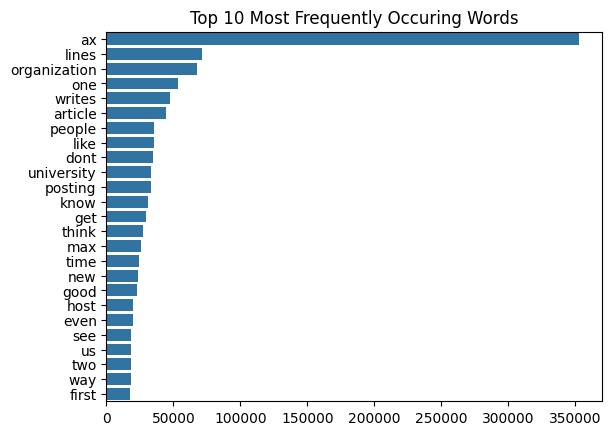

In [67]:
import seaborn as sns
sns.barplot(x=freq, y=words)
plt.title('Top 10 Most Frequently Occuring Words')
plt.show()

Creating Bigram and Trigram Models and Lemmatize

In [28]:
!pip install gensim --quiet
from gensim.models import Phrases

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# Define functions for bigrams, trigrams

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [69]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[['s', 'thing', 'car', 'nntp_poste', 'host', 'rac_wam', 'university', 'park', 'line', 'wonder', 'enlighten', 'car', 'see', 'day', 'door', 'sport', 'car', 'look', 'late', 'early', 'call', 'door', 'really', 'small', 'addition', 'separate', 'rest', 'body', 'know', 'model', 'name', 'engine', 'spec', 'year', 'production', 'car', 'make', 'history', 'info', 'funky', 'look', 'car', 'mail', 'thank', 'bring', 'neighborhood', 'lerxst']]


Creating the Dictionary and Corpus needed for Topic Modeling: The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus.

In [46]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 5), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 2), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]


Gensim creates a unique id for each word in the document. The produced corpus shown above is a mapping of (word_id, word_frequency).

In [68]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[('addition', 1),
  ('body', 1),
  ('bring', 1),
  ('call', 1),
  ('car', 5),
  ('day', 1),
  ('door', 2),
  ('early', 1),
  ('engine', 1),
  ('enlighten', 1),
  ('funky', 1),
  ('history', 1),
  ('host', 1),
  ('info', 1),
  ('know', 1),
  ('late', 1),
  ('lerxst', 1),
  ('line', 1),
  ('look', 2),
  ('mail', 1),
  ('make', 1),
  ('model', 1),
  ('name', 1),
  ('neighborhood', 1),
  ('nntp_poste', 1),
  ('park', 1),
  ('production', 1),
  ('rac_wam', 1),
  ('really', 1),
  ('rest', 1),
  ('s', 1),
  ('see', 1),
  ('separate', 1),
  ('small', 1),
  ('spec', 1),
  ('sport', 1),
  ('thank', 1),
  ('thing', 1),
  ('university', 1),
  ('wonder', 1),
  ('year', 1)]]

Building the Topic Model:

alpha and eta are hyperparameters that affect sparsity of the topics. According to the Gensim docs, both defaults to 1.0/num_topics prior.

chunksize is the number of documents to be used in each training chunk. update_every determines how often the model parameters should be updated and passes is the total number of training passes.

In [75]:
from sklearn.metrics import make_scorer

def perplexity_scorer(estimator, X, y=None):
    return -estimator.model.log_perplexity(X)

perplexity_score = make_scorer(perplexity_scorer, greater_is_better=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Define the parameter grid
param_dist = {
    'num_topics': randint(10, 50),
    'passes': randint(5, 20),
    'chunksize': randint(50, 300),
    'alpha': ['auto', 'asymmetric', 'symmetric', uniform(0.01, 0.1)]
}

# Create the model
lda_estimator = GensimLdaEstimator(id2word=id2word)

# Create the custom scorer
perplexity_score = make_scorer(perplexity_scorer, greater_is_better=False)

# Perform random search with the custom scorer
random_search = RandomizedSearchCV(lda_estimator, param_distributions=param_dist, n_iter=10, scoring=perplexity_score, cv=3, verbose=1, random_state=100)
random_search.fit(corpus)

# Print the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Get the best model
best_lda_model = random_search.best_estimator_

# Now create the final LDA model with the best parameters
lda_model = LdaModel(corpus=corpus,
                     id2word=id2word,
                     num_topics=best_lda_model.num_topics,
                     random_state=best_lda_model.random_state,
                     update_every=best_lda_model.update_every,
                     chunksize=best_lda_model.chunksize,
                     passes=best_lda_model.passes,
                     alpha=best_lda_model.alpha,
                     per_word_topics=best_lda_model.per_word_topics)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last)

Best Parameters: {'alpha': 'auto', 'chunksize': 74, 'num_topics': 13, 'passes': 12}


In [79]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=13, random_state=100, update_every=1, chunksize=74, passes=12, alpha='auto', per_word_topics=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.037*"team" + 0.035*"year" + 0.034*"game" + 0.024*"play" + 0.024*"win" + '
  '0.017*"player" + 0.012*"hockey" + 0.012*"season" + 0.012*"run" + '
  '0.011*"division"'),
 (1,
  '0.032*"people" + 0.020*"state" + 0.018*"tell" + 0.015*"right" + '
  '0.012*"child" + 0.012*"gun" + 0.010*"live" + 0.010*"say" + 0.009*"man" + '
  '0.008*"person"'),
 (2,
  '0.029*"key" + 0.023*"system" + 0.018*"space" + 0.018*"information" + '
  '0.014*"technology" + 0.013*"use" + 0.011*"datum" + 0.010*"research" + '
  '0.010*"provide" + 0.009*"ripem"'),
 (3,
  '0.027*"write" + 0.020*"article" + 0.017*"line" + 0.016*"get" + 0.016*"know" '
  '+ 0.016*"make" + 0.015*"think" + 0.014*"go" + 0.014*"say" + 0.012*"time"'),
 (4,
  '0.020*"war" + 0.018*"israeli" + 0.018*"publish" + 0.016*"armenian" + '
  '0.016*"attack" + 0.016*"exactly" + 0.014*"greek" + 0.013*"community" + '
  '0.013*"turk" + 0.012*"item"'),
 (5,
  '0.473*"ax" + 0.032*"max" + 0.019*"color" + 0.019*"suggest" + '
  '0.016*"graphic" + 0.016*"distr

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Computing Model Perplexity and Coherence Score: Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is.

In [81]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Perplexity:  -10.65825340391528

Coherence Score:  0.5302054607394365


Visualizing the topics-keywords: Each bubble on the left-hand side plot represents a topic. The larger the bubble, the more prevalent is that topic. A good topic model will have fairly big, non-overlapping bubbles scattered throughout the chart instead of being clustered in one quadrant.

A model with too many topics, will typically have many overlaps, small sized bubbles clustered in one region of the chart.

The words and bars on the right-hand are the salient keywords that form the selected topic.

In [82]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.287357 -0.103154       1        1  37.903901
1     -0.113905 -0.288362       2        1  10.783296
11    -0.219969  0.194206       3        1   9.964558
2     -0.159386  0.126771       4        1   7.533730
6     -0.149696  0.177168       5        1   6.728982
5      0.173753  0.102216       6        1   6.638127
7     -0.020439 -0.015539       7        1   5.824215
0     -0.011110 -0.072955       8        1   4.701117
9      0.116095 -0.005564       9        1   3.310260
4      0.135234 -0.059671      10        1   2.945993
8      0.063401 -0.171865      11        1   2.694192
12     0.239468  0.067063      12        1   0.851436
10     0.233911  0.049688      13        1   0.120192, topic_info=               Term          Freq         Total Category  logprob  loglift
4399             ax  40515.000000  40515.000000  Default  30.0000  30.0000
17             line  15925.000000  15925.000000  Default  29.0000  29.0000
142    organization   8811.000000   8811.000000  Default  28.0000  28.0000
143          people   7765.000000   7765.000000  Default  27.0000  27.0000
208           write  13293.000000  13293.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
48570       ossibly      0.025232      1.276631  Topic13 -11.0264   2.8000
48571      purgered      0.025232      1.276631  Topic13 -11.0264   2.8000
4873        miracle      0.025672      1.305191  Topic13 -11.0091   2.7951
7567         circle      0.025511      1.301640  Topic13 -11.0154   2.7916
4038    calculation      0.025380      1.291574  Topic13 -11.0206   2.7942

[601 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
4391      6  0.998617           _
4274      6  0.998924     ability
5280     10  0.996771  absolutely
86        3  0.257437      access
86        4  0.731514      access
...     ...       ...         ...
208       3  0.006996       write
40        1  0.182423        year
40        2  0.202741        year
40        7  0.151504        year
40        8  0.463124        year

[791 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 12, 3, 7, 6, 8, 1, 10, 5, 9, 13, 11])

In [84]:
pip install wordcloud matplotlib gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


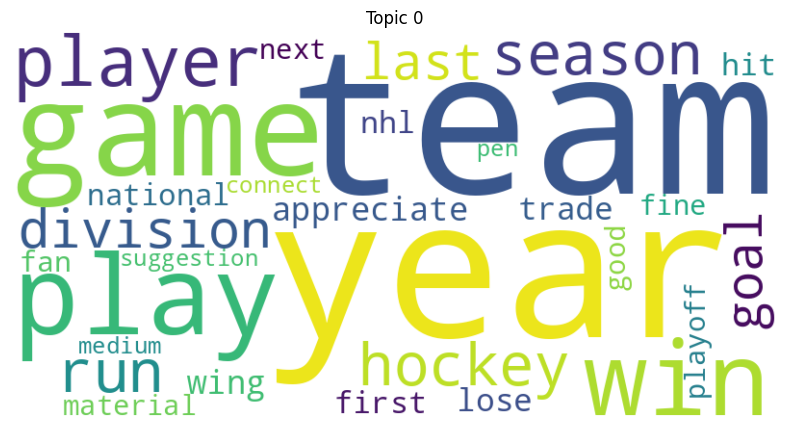

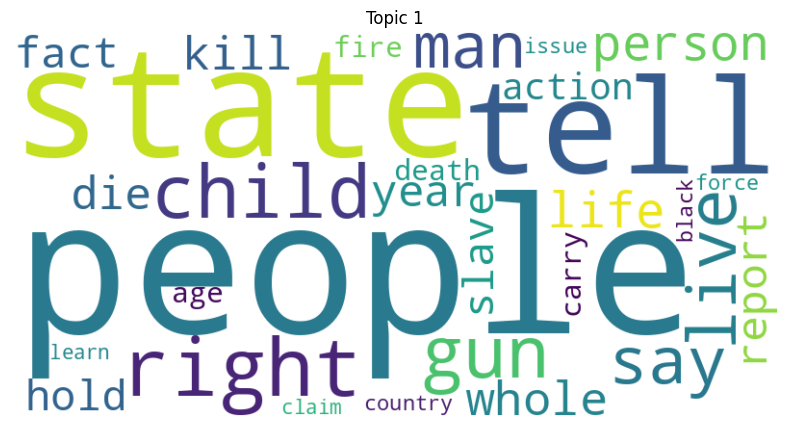

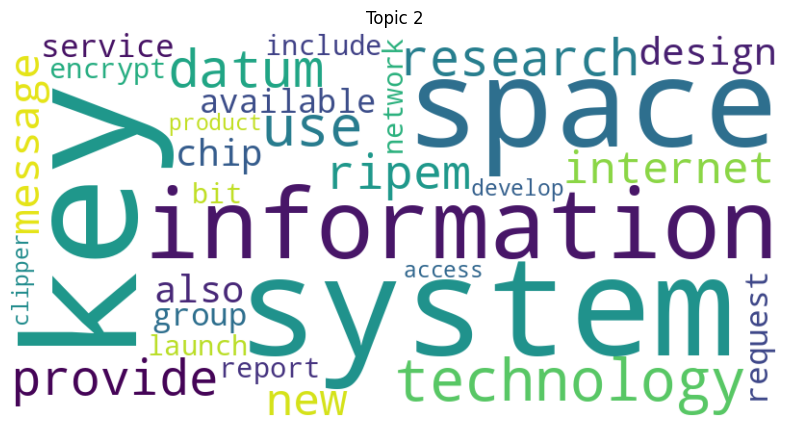

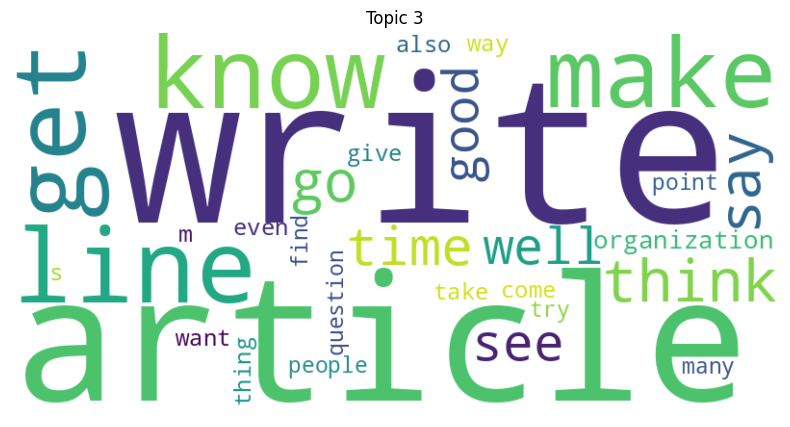

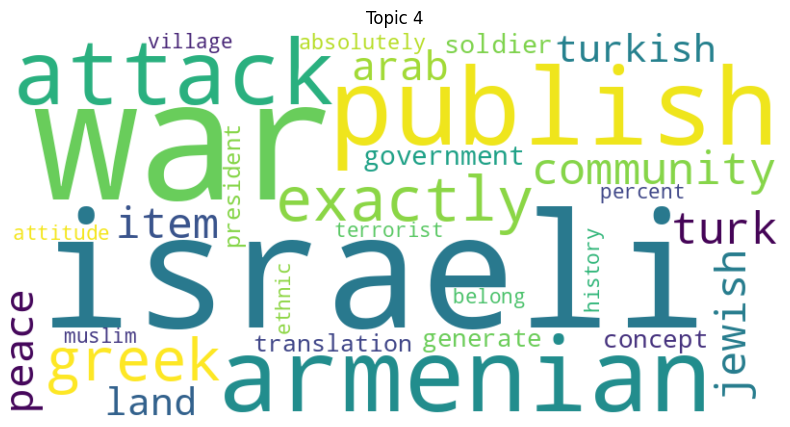

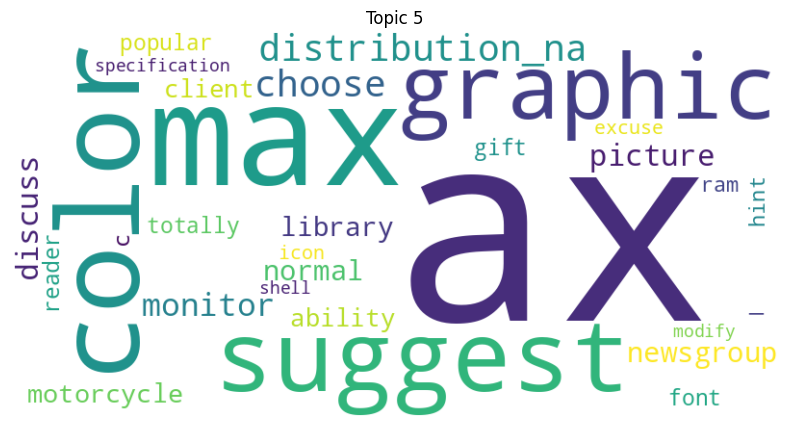

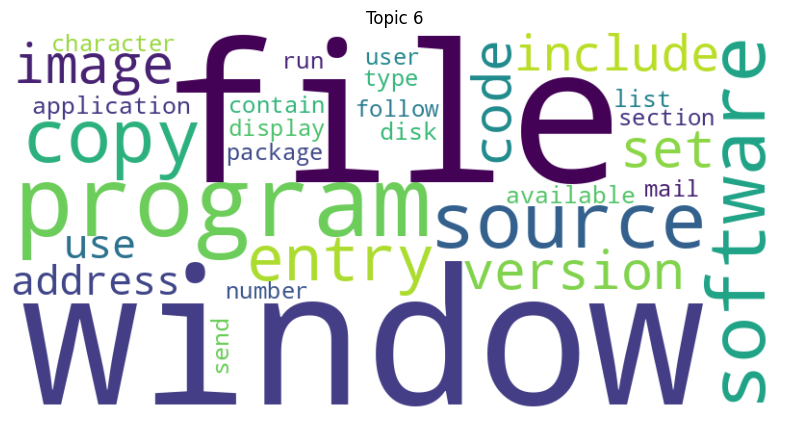

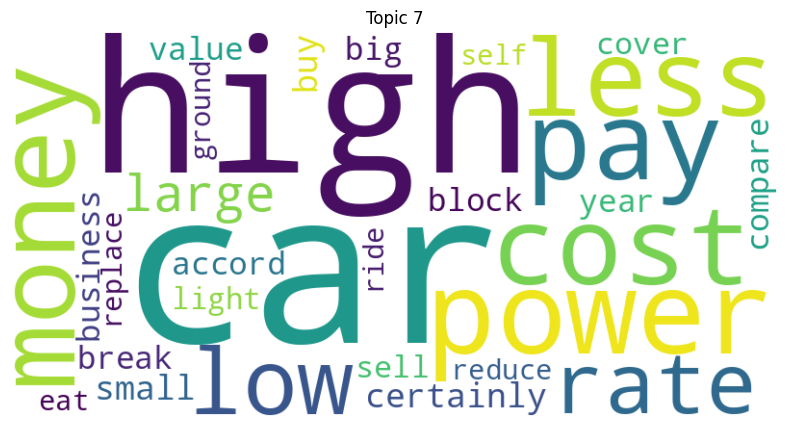

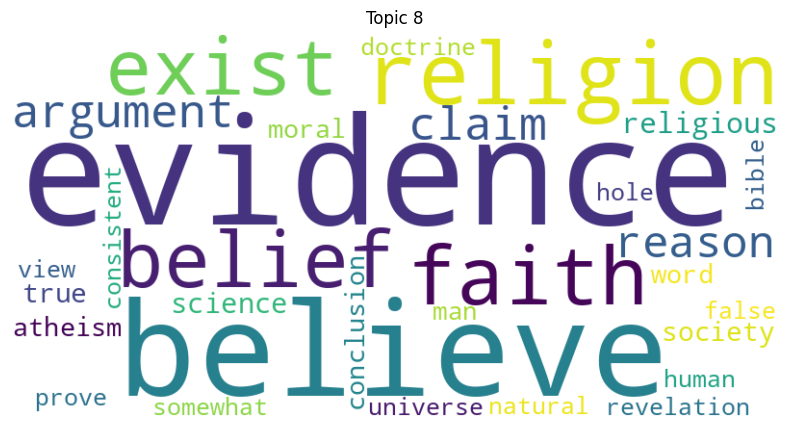

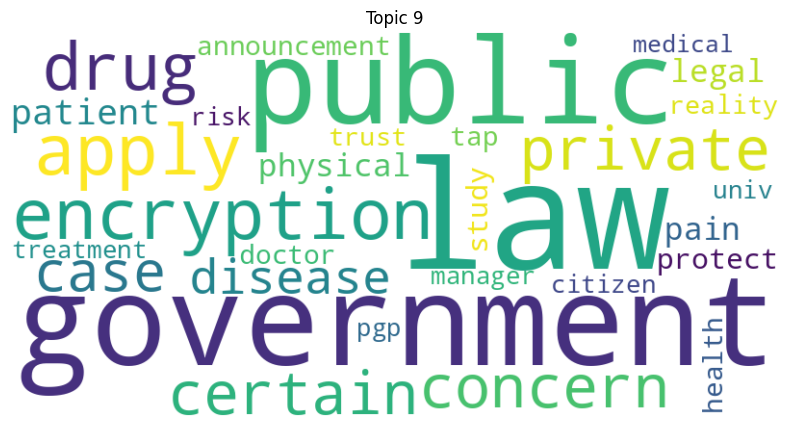

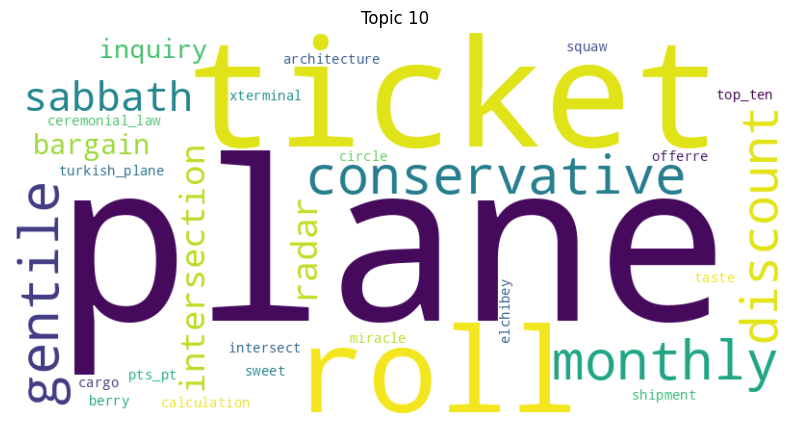

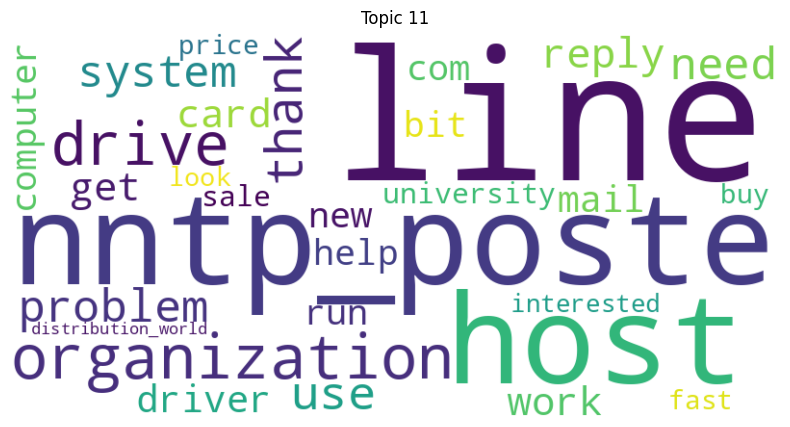

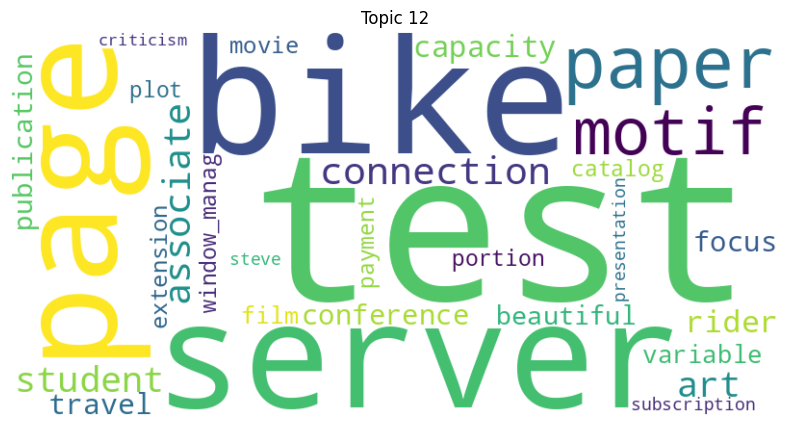

In [85]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=13,
                                            random_state=100,
                                            update_every=1,
                                            chunksize=74,
                                            passes=12,
                                            alpha='auto',
                                            per_word_topics=True)

# Generate the word clouds
for i, topic in lda_model.show_topics(formatted=False, num_topics=13, num_words=30):
    topic_words = dict(topic)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i}')
    plt.show()


**Topic Modelling using BERT**

In [75]:
data = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
!pip install bertopic --quiet
!pip install sentence-transformers --quiet
!pip install scikit-learn --quiet

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 11.6 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

# Load your data
# For demonstration, we will use the '20 newsgroups' dataset
data = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Initialize BERTopic
topic_model = BERTopic()

# Fit the model on the data
topics, probabilities = topic_model.fit_transform(data['content'])

# Print topics
print(topic_model.get_topic_info())

# Get the most representative documents per topic
print(topic_model.get_representative_docs())

# Visualize the topics
topic_model.visualize_topics()


In [86]:
topic_info = topic_model.get_topic_info()
topic_ids = topic_info[topic_info.Topic != -1].Topic  # Exclude outlier topic (-1)

# Prepare data for coherence calculation
texts = [doc.split() for doc in data['content']]  # Tokenize documents
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Get topic words
topic_words = [[word for word, _ in topic_model.get_topic(topic_id)] for topic_id in topic_ids]

# Calculate coherence score using c_v
coherence_model_cv = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_cv.get_coherence()

print(f'Coherence Score (c_v): {coherence_score}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score (c_v): 0.4600403122414196


In [ ]:
import pandas as pd
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from nltk.corpus import stopwords
import re
import nltk
import umap

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load your data
data = pd.read_json('https://raw.githubusercontent.com/selva86/datasets/master/newsgroups.json')

# Data preprocessing function
def preprocess(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters and digits
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\d+', '', text)
    # Remove stop words
    stop_words = set(stopwords.words('english')).union(ENGLISH_STOP_WORDS)
    custom_stop_words = {'im', 'would', 'nntp', 'also', 'could'}
    stop_words = stop_words.union(custom_stop_words)
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply preprocessing
data['content'] = [preprocess(doc) for doc in data['content']]

# Initialize UMAP with optimized parameters
umap_model = umap.UMAP(n_neighbors=15, n_components=5, metric='cosine')

# Initialize BERTopic with UMAP and optimized hyperparameters
topic_model = BERTopic(umap_model=umap_model, min_topic_size=50, calculate_probabilities=True, verbose=True)

# Fit the model on the data
topics, probabilities = topic_model.fit_transform(data['content'])



In [90]:
# Get topics and their words
topic_info = topic_model.get_topic_info()
topic_ids = topic_info[topic_info.Topic != -1].Topic  # Exclude outlier topic (-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [89]:
texts = [doc.split() for doc in data['content']]  # Tokenize documents
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Get topic words in the correct format for coherence calculation
topic_words = []
for topic_id in topic_ids:
    topic = topic_model.get_topic(topic_id)
    words = [word for word, _ in topic]
    topic_words.append(words)

# Calculate coherence score using c_v
coherence_model_cv = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_cv.get_coherence()

print(f'Coherence Score (c_v): {coherence_score}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Coherence Score (c_v): 0.7488516844208923


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



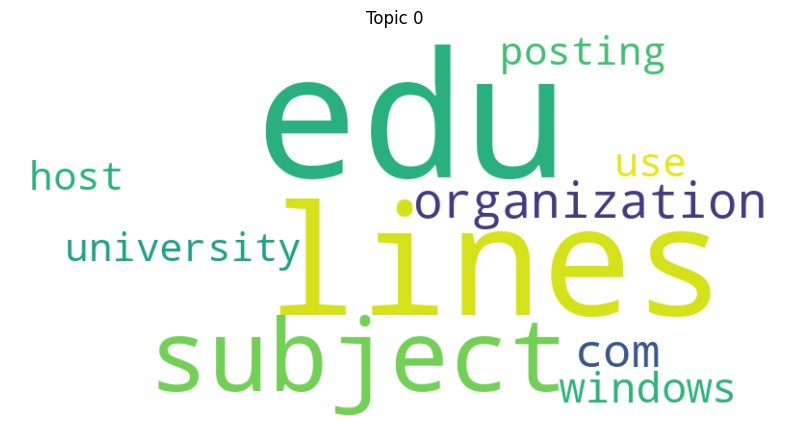

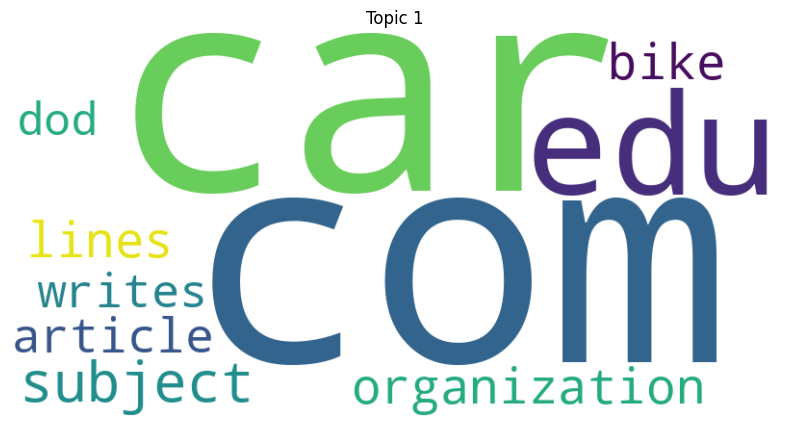

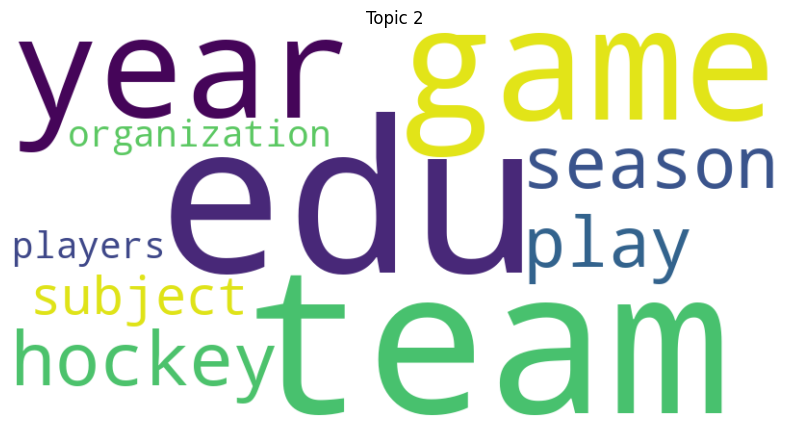

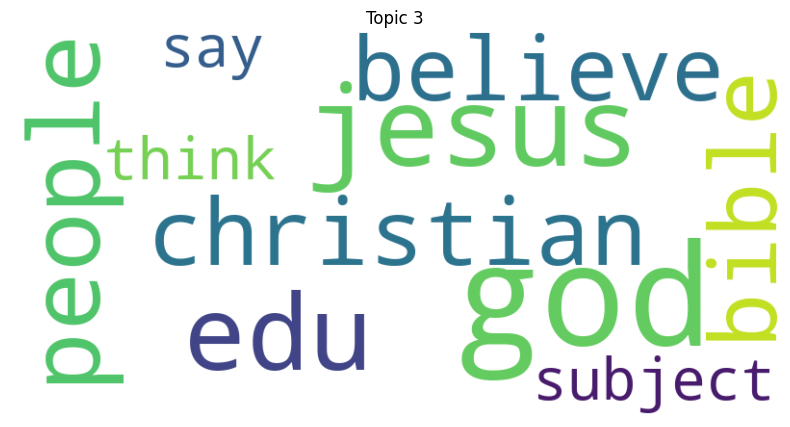

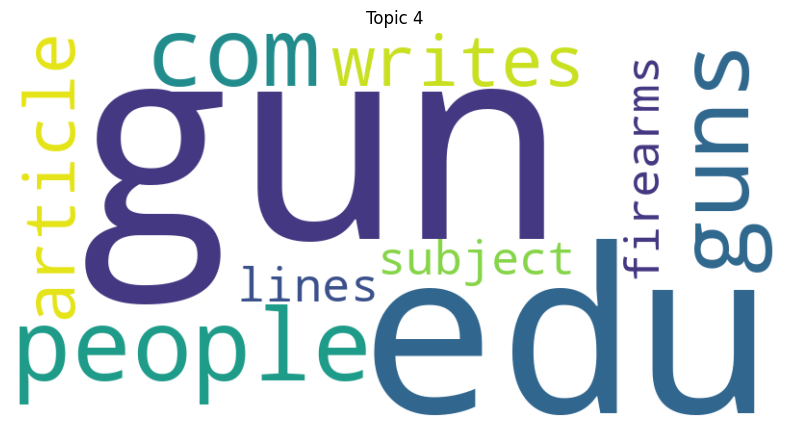

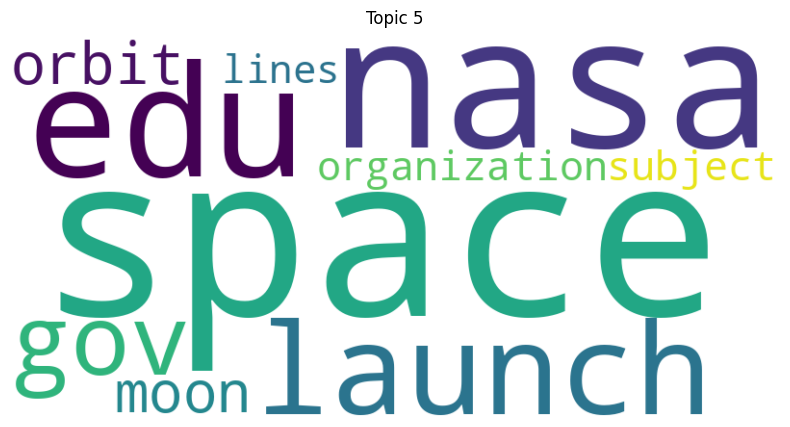

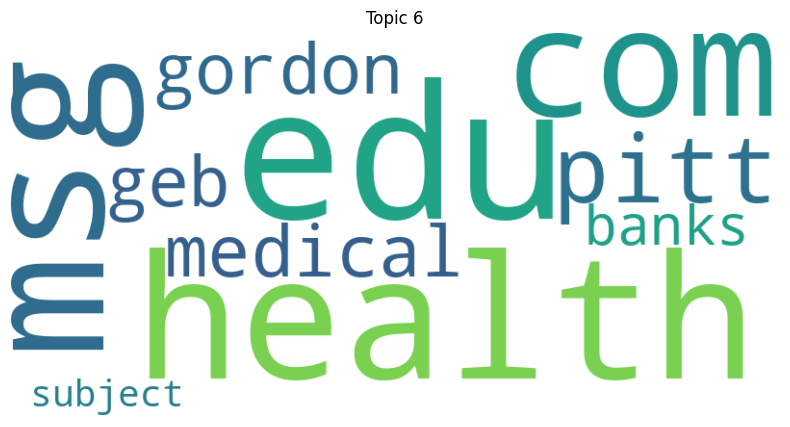

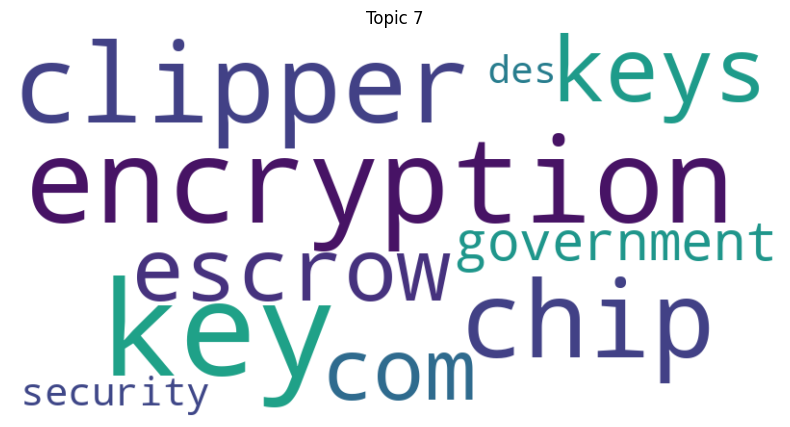

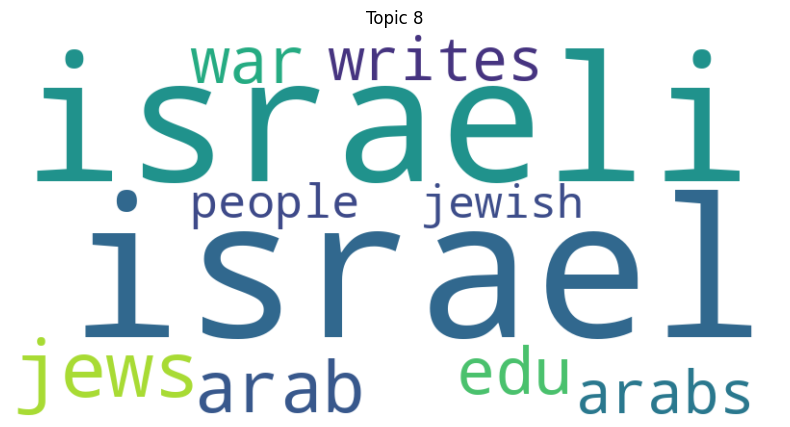

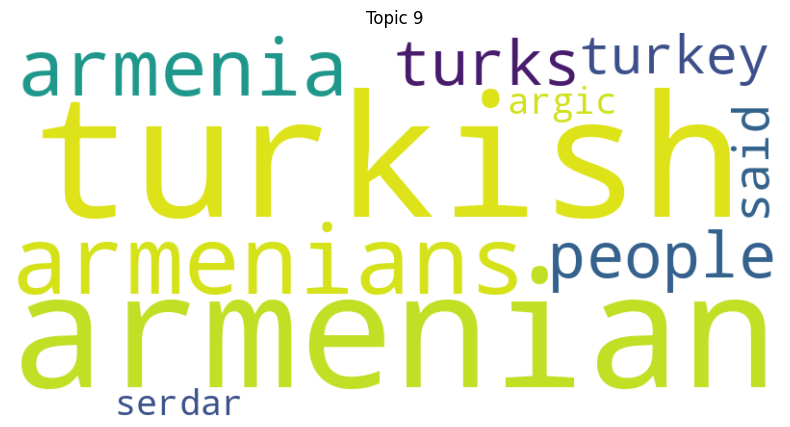

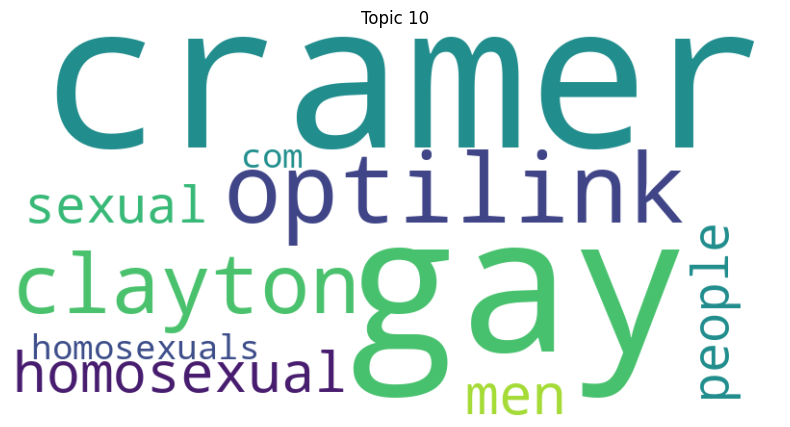

In [93]:
from wordcloud import WordCloud

def plot_wordcloud(topic_words, topic_num):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(dict(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_num}')
    plt.show()

# Get topics and their words
for topic_num in topic_model.get_topics().keys():
    if topic_num == -1:
        continue  # Skip outlier topic
    topic_words = topic_model.get_topic(topic_num)
    plot_wordcloud(topic_words, topic_num)